# Explaining Models with Shap
- Amber Kutscher

# Load Your Saved Joblib File

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier
# Load pre-trained classifier model from joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [2]:
# Load data and preprocessor
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
# Instantiate and fit your classifier model (e.g., RandomForestClassifier)
rf_reg = loaded_joblib['RandomForestRegressor']
lin_reg = loaded_joblib['LinearRegression']

In [3]:
X_test_df.head()

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
8077                       0.0                     0.0               0.0   
2391                       0.0                     0.0               0.0   
163                        0.0                     0.0               0.0   
4608                       1.0                     0.0               1.0   
5544                       0.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
8077                  0.0               0.0              0.0   
2391                  0.0               0.0              0.0   
163                   0.0               0.0              0.0   
4608                  0.0               0.0              0.0   
5544                  0.0               0.0              0.0   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
8077                     0.0                              0.0   
2391                     0.0                              0.0   
163                      0.0                              0.0   
4608                     0.0                              0.0   
5544                     0.0                              0.0   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
8077                    0.0                           0.0  ...   
2391                    0.0                           0.0  ...   
163                     0.0                           0.0  ...   
4608                    0.0                           0.0  ...   
5544                    0.0                           0.0  ...   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
8077                          0.0                          1.0   
2391                          1.0                          0.0   
163                           1.0                          0.0   
4608                          0.0                          0.0   
5544                          0.0                          0.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
8077                          0.0                        0.0   
2391                          0.0                        0.0   
163                           0.0                        0.0   
4608                          1.0                        0.0   
5544                          1.0                        1.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
8077                            1.0                            0.0   
2391                            1.0                            0.0   
163                             1.0                            0.0   
4608                            0.0                            0.0   
5544                            0.0                            0.0   

      Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  
8077                            0.0    15.250000         0.061531  132.2968  
2391                            0.0    17.850000         0.044463  127.1020  
163                             0.0     7.270000         0.071078  114.2518  
4608                            1.0    12.835253         0.075142  145.8444  
5544                            0.0    13.500000         0.121633  161.6920  

[5 rows x 31 columns]

# Explain your tree-based model with shap:

In [4]:
import shap
shap.initjs()

## Create a model explainer.

In [5]:
# Create a SHAP explainer using the model
shap_explainer = shap.Explainer(rf_reg)
shap_explainer

## Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

In [6]:
len(X_train_df)

6818

In [7]:
# Using the entire dataset (still relatively small)
X_shap = pd.concat([X_train_df, X_test_df])

In [8]:
# Get the corresponding y_shap variables
y_shap = pd.concat([y_train, y_test])
y_shap

972      314.2576
429      848.8950
6765    6930.9780
5603     169.7790
5121    3845.6608
          ...    
461      759.0120
1003     713.0718
7068    2410.1960
7616    1994.7368
6722    5865.0322
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [9]:
X_shap = X_shap.sort_index()
y_shap = y_shap.sort_index()
display(X_shap.head(),y_shap.head())

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
0                       0.0                     0.0               0.0   
1                       1.0                     0.0               0.0   
2                       0.0                     0.0               0.0   
3                       1.0                     0.0               0.0   
4                       0.0                     0.0               0.0   

   Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                  0.0               0.0              1.0   
1                  0.0               0.0              0.0   
2                  0.0               0.0              0.0   
3                  0.0               0.0              0.0   
4                  0.0               0.0              0.0   

   Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
0                     0.0                              0.0   
1                     0.0                              0.0   
2                     0.0                              0.0   
3                     0.0                              1.0   
4                     0.0                              0.0   

   Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
0                    0.0                           0.0  ...   
1                    0.0                           0.0  ...   
2                    0.0                           0.0  ...   
3                    0.0                           0.0  ...   
4                    0.0                           0.0  ...   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                          1.0                          0.0   
1                          0.0                          0.0   
2                          1.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                          0.0                        0.0   
1                          1.0                        0.0   
2                          0.0                        0.0   
3                          1.0                        1.0   
4                          1.0                        0.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            0.0                            1.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  
0                            0.0         9.30         0.016047  249.8092  
1                            0.0         5.92         0.019278   48.2692  
2                            0.0        17.50         0.016760  141.6180  
3                            0.0        19.20         0.000000  182.0950  
4                            0.0         8.93         0.000000   53.8614  

[5 rows x 31 columns]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [10]:
# Combine the training and test data
X_shap = pd.concat([X_train_df, X_test_df])
y_shap = pd.concat([y_train, y_test])
X_shap = X_shap.sort_index()
y_shap = y_shap.sort_index()

## Calculate the shap values for your model.

In [11]:
# Get SHAP values from explainer for training data
shap_values = shap_explainer(X_shap, y_shap)

In [34]:
X_shap_sampled = shap.sample(X_train_df, nsamples=500, random_state=321)
y_shap_sampled = y_train.loc[X_shap_sampled.index]

In [35]:
X_shap_local = X_shap_sampled.reset_index(drop=True)
y_shap_local = y_shap_sampled.reset_index(drop=True)

# Global Explanations

## Feature Filters

### Item Visibility

In [36]:
X_shap_local['Item_Visibility'].agg(['mean','median'])

mean      0.067401
median    0.053821
Name: Item_Visibility, dtype: float64

In [37]:
tolerance = 0.001
filt_med_item_vis = abs(X_shap_local['Item_Visibility'] - 0.053821) < tolerance
len(X_shap_local[filt_med_item_vis])

7

### Item Weight

In [38]:
X_shap_local['Item_Weight'].agg(['mean','median'])

mean      12.666816
median    12.835253
Name: Item_Weight, dtype: float64

In [39]:
tolerance = 0.001
filt_med_item_weight = abs(X_shap_local['Item_Weight'] - 12.835253) < tolerance
len(X_shap_local[filt_med_item_weight])

90

### Outlet Type Filters

In [40]:
filt_outlet_type_gs= X_shap_local['Outlet_Type_Grocery Store'] == True
len(X_shap_local[filt_outlet_type_gs])

69

In [41]:
filt_outlet_type_sm1 = X_shap_local['Outlet_Type_Supermarket Type1'] == True
len(X_shap_local[filt_outlet_type_sm1])

306

In [42]:
filt_outlet_type_sm2 = X_shap_local['Outlet_Type_Supermarket Type2'] == True
len(X_shap_local[filt_outlet_type_sm2])

67

In [43]:
filt_outlet_type_sm3 = X_shap_local['Outlet_Type_Supermarket Type3'] == True
len(X_shap_local[filt_outlet_type_sm3])

58

### Median and Mean Thresholds

In [44]:
# Find median and mean values
median_value = y_shap_local.median()
mean_value = y_shap_local.mean()
# Find median and mean thresholds
threshold_med = 0.5 * median_value
threshold_mean = 0.5 * mean_value
print("Median Threshold:", threshold_med)
print("Mean Threshold:", threshold_mean)

Median Threshold: 934.7832
Mean Threshold: 1104.1067928


In [45]:
# Filter for "high" and "low" sales based on conditions
filt_low = y_shap_local < threshold_med
filt_high = y_shap_local >= threshold_mean

# Apply filters to X_shap_local
X_low = X_shap_local[filt_low]
X_high = X_shap_local[filt_high]

# Get the lengths
length_low = len(X_low)
length_high = len(X_high)
print("Length of low:", length_low)
print("Length of high:", length_high)

Length of low: 144
Length of high: 332


## Getting Final Predictions


In [46]:
y_pred = rf_reg.predict(X_shap_local)
y_pred = pd.Series(y_pred, index=X_shap_local.index, name='Predicted')
y_pred

0      2248.932582
1       956.694678
2      1969.030262
3      9510.127408
4       910.394946
          ...     
495    3883.957616
496     811.450408
497    1330.954174
498     967.027894
499    3087.754028
Name: Predicted, Length: 500, dtype: float64

## Create a summary plot - with plot_type='bar'

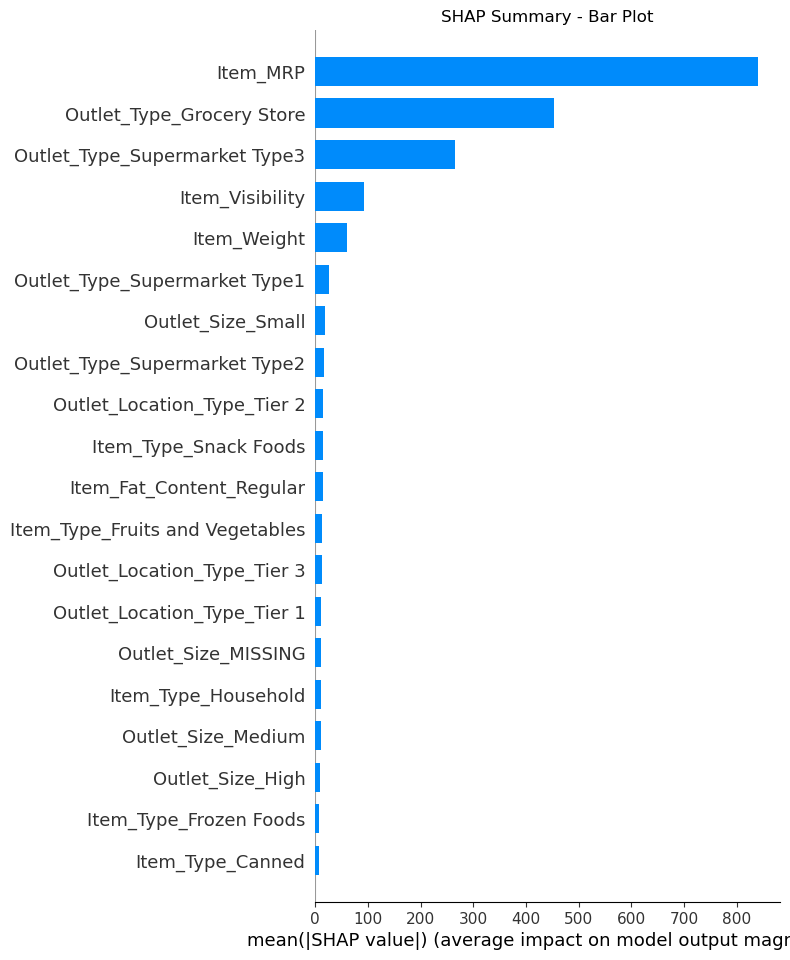

In [47]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features=X_shap_local, plot_type='bar', show=False)
ax.set_title('SHAP Summary - Bar Plot')
fig.savefig('Images/shap_bar_plot.png')

![RandomForest](Images/randomforest_coeffs.png)

### Compare the most important features according to SHAP vs. your original feature importances. Are they the same features in both? If not, what's different?

- The most important features according to SHAP are:
    - Item_MRP
    - Outlet_Type_Grocery Store
    - Outlet_Type_Supermarket Type3
    - Item_Visibility
    - Item_Weight

- In comparison, the 5 most important features from our original model are:
    - Item_MRP
    - Outlet_Type_Grocery Store
    - Item_Visibility
    - Outlet_Type_Supermarket Type3
    - Item_Weight

As can be seen, the most important features according to both models are the same, however the order is a bit different.

## Create a second summary plot - with plot_type='dot'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


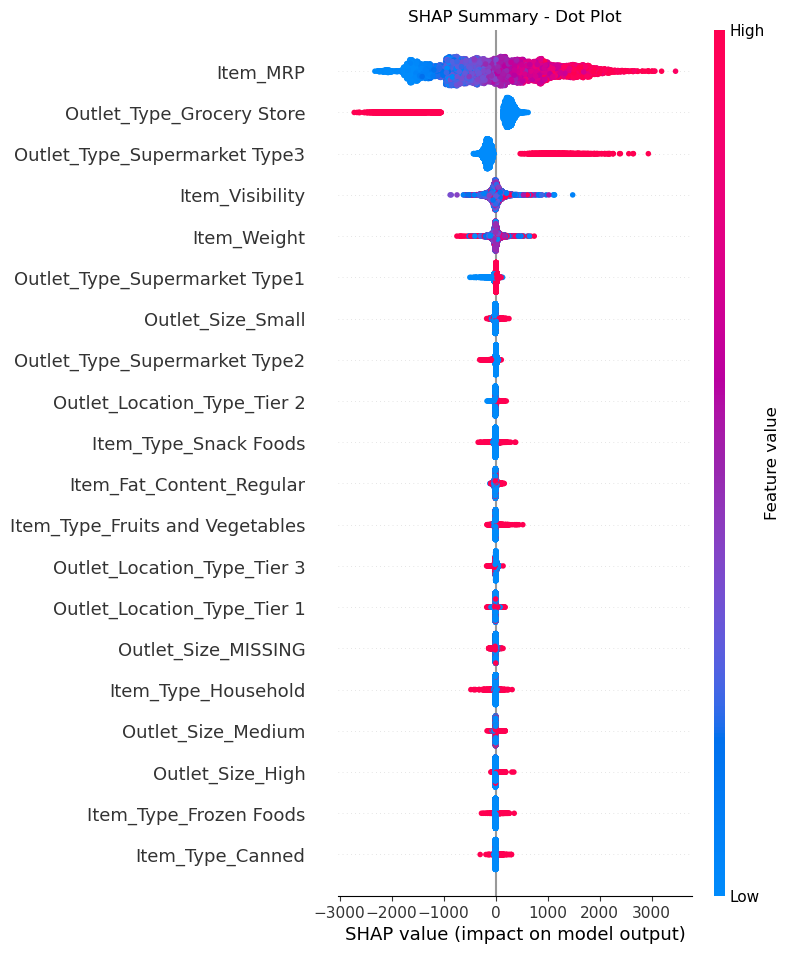

In [48]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features=X_shap, plot_type='dot', show=False)
ax.set_title('SHAP Summary - Dot Plot');
fig.savefig('Images/shap_dot_plot.png')

### Interpret the top 3 most important features and how they influence your model's predictions.

In [49]:
# Calculate the absolute mean SHAP values for each feature
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Find the indices of the top 3 features with the highest mean SHAP values
top_feature_indices = np.argsort(mean_shap_values)[-3:]

# Get the feature names corresponding to the top indices
top_feature_names = X_shap_local.columns[top_feature_indices]

# Get the mean SHAP values of the top features
top_mean_shap_values = mean_shap_values[top_feature_indices]

# Display the top 3 important features and their mean SHAP values
print("Top 3 important features and their influence:")
for feature, shap_value in zip(top_feature_names, top_mean_shap_values):
    print(f"Feature: {feature}, Mean SHAP Value: {shap_value}")

Top 3 important features and their influence:
Feature: Outlet_Type_Supermarket Type3, Mean SHAP Value: 265.4657451003641
Feature: Outlet_Type_Grocery Store, Mean SHAP Value: 452.8517222605785
Feature: Item_MRP, Mean SHAP Value: 840.2730890892899


As per the SHAP ummary - Dot Plot, the 3 most important features are:
1. "Outlet_Type_Supermarket Type3"
    - Among the three types of supermarkets, Supermarket Type3 has the most substantial financial impact on item outlet sales, according to the model. This suggests that Supermarket Type3 stores may be the largest among the three and have the highest influence on the predicted sales of products.
2. "Outlet_Type_Grocery Store"
    - Products sold in grocery stores have a smaller impact on item outlet sales compared to those sold in supermarkets. In other words, the type of outlet significantly influences the model's predictions, and grocery stores tend to have a lower effect on sales.
3. "Item_MRP"
    - When the listed price (Item MRP) of a product increases, the model predicts higher overall item outlet sales. This implies that as the price of a product goes up, the model anticipates an increase in the number of units sold for that product.

# Local Explanations

In [50]:
# Import LimeTabularExplainer
from lime.lime_tabular import LimeTabularExplainer

In [51]:
# Create a LIME explainer
explainer_lime = LimeTabularExplainer(
    training_data=X_shap.values, 
    feature_names=X_shap.columns,
    mode="regression")
explainer_lime

## High Sales

In [52]:
# LIME explanation for high sales
high_sales_example = X_test_df[y_test == y_test.max()].values[0]
high_sales_explanation = explainer_lime.explain_instance(high_sales_example, rf_reg.predict)
high_sales_explanation.show_in_notebook()
plt.savefig('Images/lime_explanation_high_sales.png')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


<Figure size 640x480 with 0 Axes>

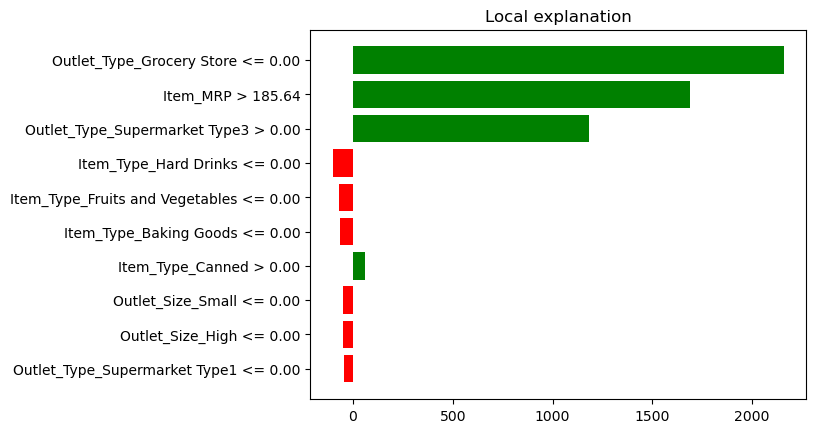

In [53]:
# Create and save the force plot as a PNG image
high_sales_force_plot = high_sales_explanation.as_pyplot_figure()
high_sales_force_plot.savefig('Images/lime_forceplot_high_sales.png')

Based on the LIME explanations, it appears that the following features heavily influenced the model's predictions for the high sales example:
1. Outlet_Type_Grocery Store (0.00): This feature has a low impact on the predicted sales, which is expected as grocery stores typically have lower sales compared to other types of outlets.
2. Item_MRP (228.04): The most significant feature affecting sales is the Maximum Retail Price (Item MRP). A higher MRP corresponds to higher predicted sales, suggesting that as the price of a product increases, the model predicts higher sales.
3. Outlet_Type_Supermarket Type3 (1.00): Supermarket Type3 has the highest impact among the outlet types on the predicted sales. This implies that this type of supermarket is expected to have a substantial positive influence on sales.
4. Item_Type_Seafood (0.00): Seafood items have a low impact on sales predictions.
5. Item_Type_Starchy Foods (0.00): Starchy Foods also have a low impact on sales predictions.
6. Item_Type_Frozen Foods (0.00): The type of food categorized as Frozen Foods has a low impact on sales predictions.
7. Item_Type_Meat (0.00): Meat products have a low impact on sales predictions.
8. Outlet_Type_Supermarket Type2 (0.00): Supermarket Type2 has little to no impact on sales predictions.
9. Item_Type_Health and Hygiene (0.00): Health and Hygiene items also have a low impact on sales predictions.
10. Item_Type_Breads (0.00): The category of Breads has a low impact on sales predictions.

In summary, the model's predictions for high sales are primarily influenced by the product's Maximum Retail Price (Item MRP), the type of outlet (with Supermarket Type3 having the most significant impact), and various product categories, with some categories having low or negligible effects on sales.

## Low Sales

In [54]:
# LIME explanation for low sales
low_sales_example = X_test_df[y_test == y_test.min()].values[0]
low_sales_explanation = explainer_lime.explain_instance(low_sales_example, rf_reg.predict)
low_sales_explanation.show_in_notebook()
plt.savefig('Images/lime_explanation_low_sales.png')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


<Figure size 640x480 with 0 Axes>

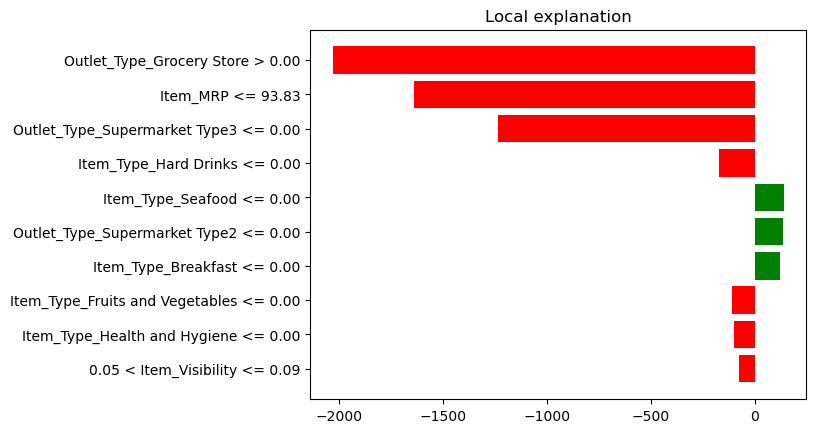

In [55]:
# Create and save the force plot as a PNG image
low_sales_force_plot = low_sales_explanation.as_pyplot_figure()
low_sales_force_plot.savefig('Images/lime_forceplot_low_sales.png')

According to the LIME explanations for the low sales example, the following features most heavily influenced the model's predictions:
1. Outlet_Type_Grocery Store (1.00): The type of outlet being a "Grocery Store" has a significant impact on the model's prediction for low sales. A grocery store type of outlet is associated with lower sales.
2. Item_MRP (33.39): The Maximum Retail Price (Item MRP) still plays a role in influencing sales, but in this case, lower MRP values are associated with low predicted sales.
3. Outlet_Type_Supermarket Type3 (0.00): For low sales, Supermarket Type3 does not have a strong influence on the model's predictions.
4. Item_Type_Starchy Foods (0.00): Starchy Foods, in this context, have a minimal impact on sales predictions for low sales.
5. Item_Type_Breads (0.00): The category of Breads also has a minimal impact on sales predictions for low sales.
6. Item_Type_Others (0.00): The category "Others" has little influence on the model's predictions for low sales.
7. Outlet_Size_High (0.00): The size of the outlet being "High" has a negligible impact on low sales predictions.
8. Item_Type_Canned (0.00): The category of Canned items also has a minimal effect on low sales predictions.
9. Item_Type_Health and Hygiene (0.00): Health and Hygiene items have little impact on low sales predictions.
10. Item_Type_Seafood (0.00): Seafood items have a minimal effect on the model's predictions for low sales.

In summary, for the low sales prediction, the type of outlet (Grocery Store) and the product's Maximum Retail Price (Item MRP) are the most influential factors, with lower MRP values being associated with low predicted sales. Other product categories and outlet types have little to no impact on low sales predictions.